# Palikkamalli hiukkaspiikkien löytämiseen

Kun dataa on suuria määriä, sen analysointi käsin ja ihmissilmin käy vaivalloiseksi. Tällöin tarvitaan algoritmeja, joilla mahdollisten havaintojen varmentaminen käy automatisoidusti. Tämä ei kuitenkaan poista inhimillisen osaamisen tärkeyttä, sillä koneet kuitenkin tekevät vain mitä niiden käsketään tehdä. Tutkijoita tarvitaan tulkkaamaan ja hienosäätämään sekä löydöksiä että ohjelmistoja, jotta työssä vältyttäisiin "vääriltä positiivisilta" ja virheiltä.

Tässä harjoitteessa rakennetaan yksinkertainen ohjelma, joka käy läpi sille syötettyjä havaintoja ja kertoo, onko se havainnut siellä ympäristöään korkeampaa aktiivisuutta.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# Otetaan dataksi CMS-kokeen myoniparihavaintoja 2011A-ajosta.

dimuon = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

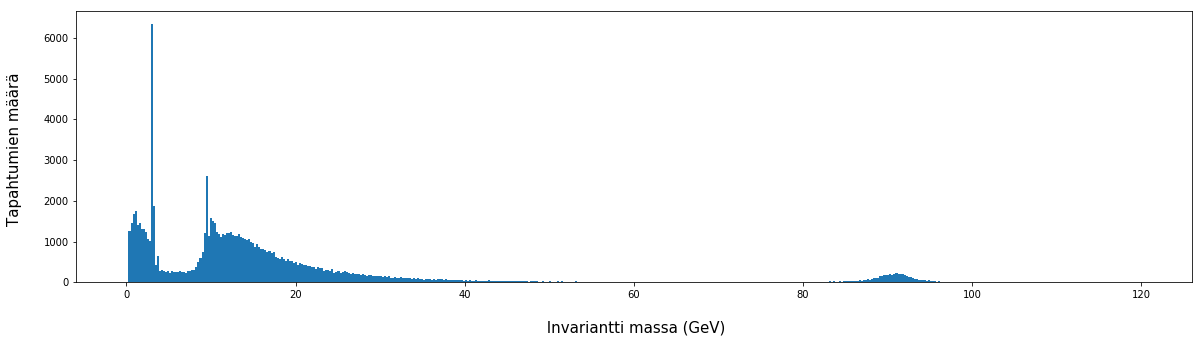

In [5]:
# Katsotaan miltä data kokonaisuudessaan näyttää ja missä nyt ainakin selkeästi esiintyy piikkejä.

plt.figure(figsize = (20,5))
plt.hist(dimuon.M, bins = 500, range = (0,120))

plt.xlabel("\n Invariantti massa (GeV)", fontsize = 15)
plt.ylabel("Tapahtumien määrä \n", fontsize = 15)
plt.show()

Monenko GeVin askeleet (1 toimii)? 1
Monestako GeVistä aloitetaan (0 tai yli toimii)? 0
Mihin asti katsotaan (120 riittänee)? 100


Mediaani askeleessa 0 on: 439.5
Moodi askeleessa 0 on: 596

Mediaani askeleessa 1 on: 578.0
Moodi askeleessa 1 on: 894

Mediaani askeleessa 2 on: 455.0
Moodi askeleessa 2 on: 561

Mediaani askeleessa 3 on: 227.0
Moodi askeleessa 3 on: 4310

Mediaani askeleessa 4 on: 116.5
Moodi askeleessa 4 on: 133

Mediaani askeleessa 5 on: 105.5
Moodi askeleessa 5 on: 128

Mediaani askeleessa 6 on: 103.5
Moodi askeleessa 6 on: 119

Mediaani askeleessa 7 on: 115.0
Moodi askeleessa 7 on: 128

Mediaani askeleessa 8 on: 202.0
Moodi askeleessa 8 on: 301

Mediaani askeleessa 9 on: 500.0
Moodi askeleessa 9 on: 1311

Mediaani askeleessa 10 on: 564.0
Moodi askeleessa 10 on: 719

Mediaani askeleessa 11 on: 476.5
Moodi askeleessa 11 on: 537

Mediaani askeleessa 12 on: 494.0
Moodi askeleessa 12 on: 531

Mediaani askeleessa 13 on: 473.5
Moodi askeleessa 13 on: 528

Mediaani askeleess

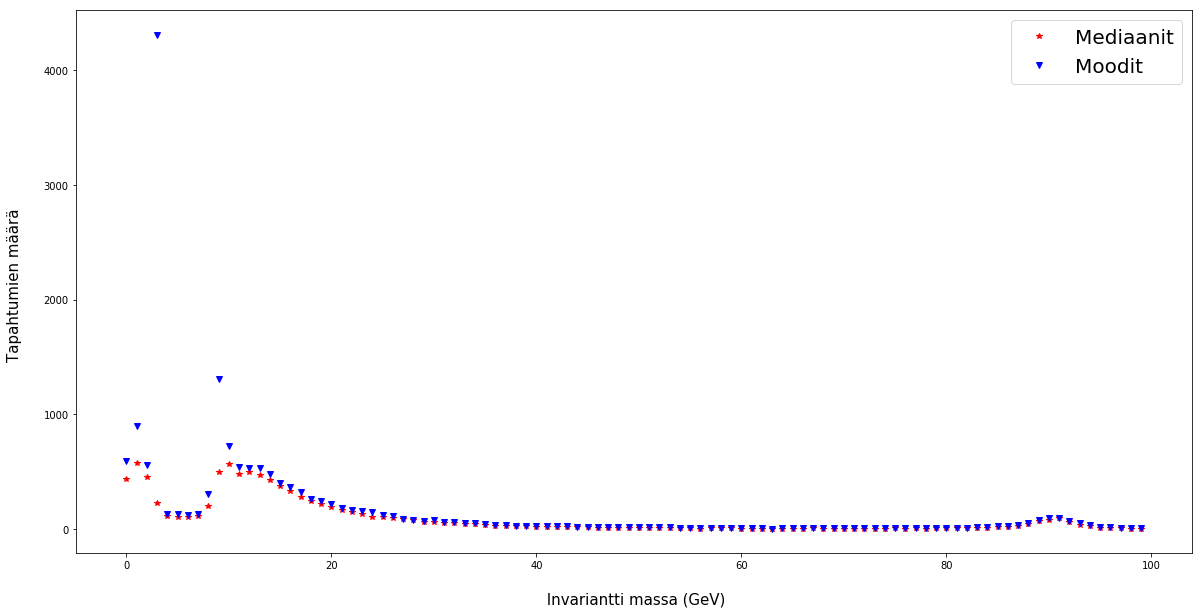

In [8]:
# Tämä ohjelma paloittelee datan siivuihin ja havaitsee kunkin palan korkeimman piikin.

# Annetaan ensin manuaalisesti halutut rajat, joita voi koettaa muutella toimivuuden testaamisen jälkeen.

step = int(input('Monenko GeVin askeleet (1 toimii)? '))
start = int(input('Monestako GeVistä aloitetaan (0 tai yli toimii)? '))
end = int(input('Mihin asti katsotaan (120 riittänee)? '))

print('\n')

bins = int((end-start)/step)

hist, edges = np.histogram(dimuon.M[(dimuon.M <= end) & (dimuon.M >= start)], bins)

# Käytetään kunkin palan kohdalla mediaaneja ja moodeja. Miksi ne sopivat yksinkertaiseen tarkasteluun?

medians = np.ones(len(edges)-1)
modes = np.ones(len(edges)-1)

for i in range (0,len(edges)-1):
    cut = dimuon.M[(dimuon.M >= start)&(dimuon.M < (start + step))]
    start = start + step
    breakdown, precision = np.histogram(cut, bins = 10)
    print('Mediaani askeleessa ' + str(i) + ' on: ' + str(np.median(breakdown)))
    print('Moodi askeleessa ' + str(i) + ' on: ' + str(max(breakdown)) + '\n')
    medians[i] = np.median(breakdown)
    modes[i] = max(breakdown)

plt.figure(figsize = (20,10))
plt.plot(medians, 'r*', label = 'Mediaanit')
plt.plot(modes, 'vb', label = 'Moodit')
plt.legend(fontsize = 20)
plt.xlabel("\n Invariantti massa (GeV)", fontsize = 15)
plt.ylabel("Tapahtumien määrä \n", fontsize = 15)
plt.show()

Millaisia tarkennuksia ja parannuksia menetelmään voisi ainakin kehittää?